In [3]:
# Instalando bibliotecas
!pip install pandas numpy matplotlib seaborn yfinance mplfinance


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
     ---------------------------------------- 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
# Plotando o gráfico de candlestick
def plotar_dados(x):
    df = x.copy()
    kwargs = {'warn_too_much_data': len(df)}

    plt.figure(figsize=(18,6))
    mpf.plot(df, type='candle', title='Gráfico de Candlestick', ylabel='Preço', volume=True, **kwargs)
    plt.show()

In [6]:
# Símbolo da ação que você deseja baixar
symbol = 'GOOGL'

# Baixe dados históricos do Yahoo Finance usando yfinance
goog = yf.download(symbol, start="2013-01-01", end="2023-01-01")

display(goog.head())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


<Figure size 1800x600 with 0 Axes>

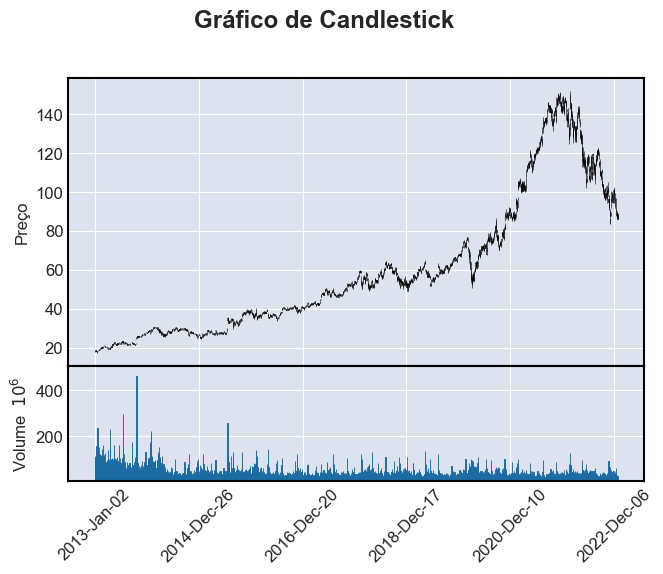

In [10]:
plotar_dados(goog)

In [9]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1)) 
goog['Volatility'] = goog['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
goog

,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility
Date,,,,,,,,
2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348,NaN,NaN
2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272,0.000581,NaN
2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460,0.019568,NaN
2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772,-0.004373,NaN
2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956,-0.001975,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000,0.016612,0.384252
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300,-0.020836,0.384614
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200,-0.015801,0.384809


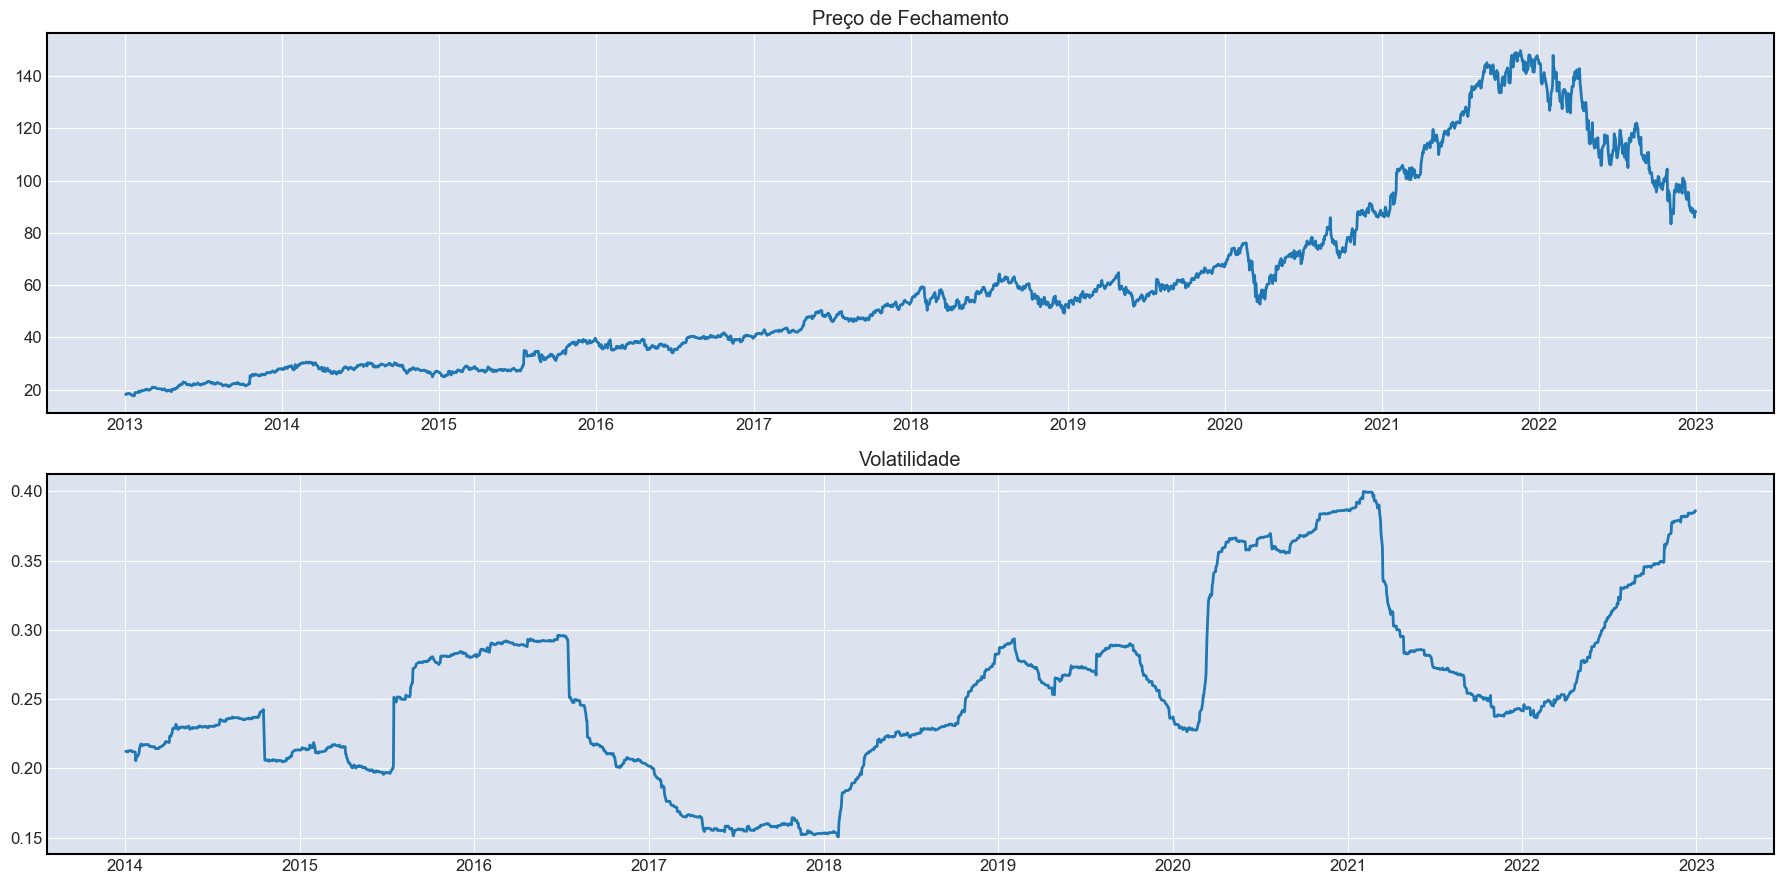

In [16]:
plt.figure(figsize=(18,9))
plt.subplot(2, 1, 1)
plt.plot(goog["Close"])
plt.title('Preço de Fechamento')

plt.subplot(2, 1, 2)
plt.plot(goog["Volatility"])
plt.title('Volatilidade')


plt.tight_layout()
plt.show()

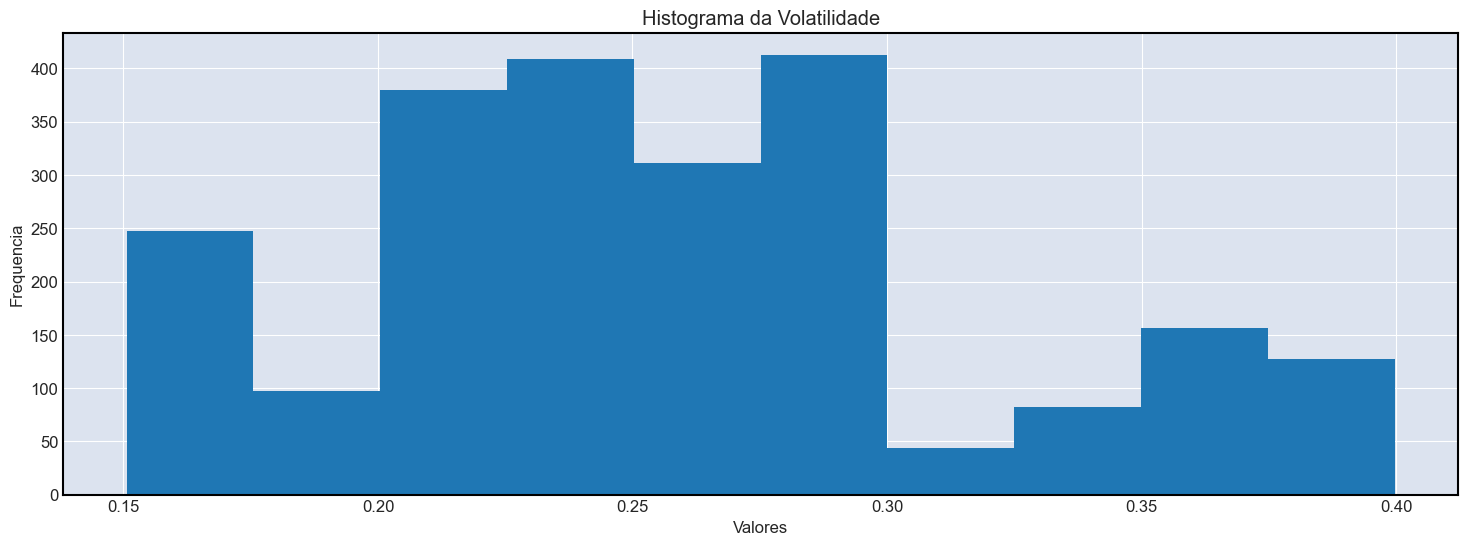

In [27]:
plt.figure(figsize=(18,6))
plt.title("Histograma da Volatilidade")
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.hist(goog["Volatility"])
plt.show()

In [37]:
media = np.mean(goog["Volatility"].dropna())
mediana = np.median(goog["Volatility"].dropna())
desvio_padrao = np.std(goog["Volatility"].dropna())
quartis = np.quantile(goog["Volatility"].dropna(), [.25, .50, .75])


print(f"Média: {media:.3f}")
print(f"Mediana: {mediana:.3f}")
print(f"Desvio Padrão: {desvio_padrao:.3f}")
print(f"Primeiro Quartil (Q1): {quartis[0]:.3f}")
print(f"Mediana (Q2): {quartis[1]:.3f}")
print(f"Terceiro Quartil (Q3): {quartis[2]:.3f}")

Média: 0.257
Mediana: 0.250
Desvio Padrão: 0.062
Primeiro Quartil (Q1): 0.215
Mediana (Q2): 0.250
Terceiro Quartil (Q3): 0.289
